## Predicting timbre by the Fourier transform

### Intro

By analyzing a soundwave using the FFT, this widget helps interpolate the spectral distribution to create a rough model of a player's timbre. Still fine-tuning some of the normalization, but will perform modestly on a few bars (given that recordings are regular enough).

### Author

By Daniel Zhao

### Transforming the data

In [17]:
# import necessary modules

import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

In [11]:
import scipy.io.wavfile as wav

In [18]:
fs, data = wav.read('test.wav')

In [32]:
all_sound = data.T[0]

In [33]:
len(all_sound)

1363456

In [56]:
truncated = all_sound[:60000]
norm=[(ele/2**16.)*2-1 for ele in truncated]

In [63]:
## crucial step -- applying the fft

transformed = fft(norm)

### Including the fundamental frequency

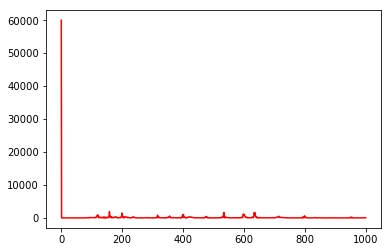

In [61]:
## plotting the real components, up to 1000

plt.plot(abs(c[:1000]),'r') 
plt.show()

### Without fundamental frequency

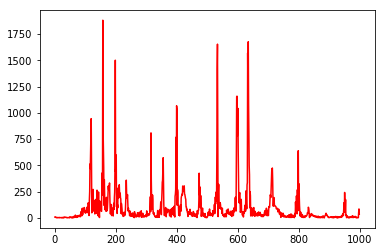

In [62]:
plt.plot(abs(c[1:1000]),'r') 
plt.show()

The fundamental frequency is orders of magnitude larger than any of the other components.

In [65]:
## sampling freqency of our test.wav

fs = 44100

In [67]:
k = np.arange(len(data))
T = len(data)/fs  # where fs is the sampling frequency
frqLabel = k/T  

In [ ]:
plt.xticks(frqLabel)

In [ ]:
np.interp([0, 2, 3, 4], c[0], c[1])

### Listening to the music

Run these cells if you want to here what your waveform sounds like after being truncated/normalized!

In [46]:
import sounddevice as sd

In [64]:
## Listen to truncated version

sd.play(norm) 